In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pgeocode
import folium
from folium.plugins import HeatMap
import numpy as np

In [2]:
df = pd.read_csv('./redacted-Results-Oct20-Mar21.csv')
df = df[['original_zip', 'state_code', 'county_code', 'tract_code', 'block_code', 'RRF Award Amount ', 'Rent owing']]
print(df.isna().sum())
df.describe()

original_zip         10
state_code            0
county_code           0
tract_code            2
block_code            2
RRF Award Amount     38
Rent owing            1
dtype: int64


,original_zip,state_code,county_code,tract_code,block_code,RRF Award Amount,Rent owing
count,745.000000,755.0,755.0,753.000000,753.000000,717.000000,754.000000
mean,2127.285906,25.0,25.0,73461.377158,2181.288181,4532.443291,3864.553263
std,17.393536,0.0,0.0,35294.379937,1230.228946,1363.272750,3472.594496
min,2108.000000,25.0,25.0,101.000000,1000.000000,400.000000,0.000000
25%,2122.000000,25.0,25.0,50600.000000,1005.000000,3750.000000,1500.000000
50%,2126.000000,25.0,25.0,81400.000000,2002.000000,4200.000000,3250.000000
75%,2128.000000,25.0,25.0,100100.000000,3003.000000,6000.000000,5287.500000
max,2467.000000,25.0,25.0,140400.000000,7000.000000,6000.000000,25000.000000


In [3]:
zipCode = df['original_zip'].dropna().astype(str).map(lambda x: '0'+x[:-2]).unique()
zipCode = sorted(zipCode)
zipCode

['02108',
 '02109',
 '02111',
 '02113',
 '02114',
 '02115',
 '02116',
 '02118',
 '02119',
 '02120',
 '02121',
 '02122',
 '02124',
 '02125',
 '02126',
 '02127',
 '02128',
 '02129',
 '02130',
 '02131',
 '02132',
 '02134',
 '02135',
 '02136',
 '02199',
 '02210',
 '02215',
 '02467']

In [4]:
region_name = {
        '02108': 'Beacon Hill',
        '02109': 'Markets / Inner Harbor',
        '02111': 'Chinatown / Tufts-New England Medical Center',
        '02113': 'North End',
        '02114': 'West End / Back of the Hill',
        '02115': 'Fenway / East Fens / Longwood',
        '02116': 'Back Bay',
        '02118': 'South End',
        '02119': 'Roxbury',
        '02120': 'Roxbury Crossing',
        '02121': 'Roxbury / Grove Hall',
        '02122': 'Dorchester / Fields Corner',
        '02124': 'Dorchester / Codman Square',
        '02125': 'Dorchester / Uphams Corner',
        '02126': 'Mattapan',
        '02127': 'South Boston',
        '02128': 'East Boston',
        '02129': 'Charlestown',
        '02130': 'Jamaica Plain',
        '02131': 'Roslindale',
        '02132': 'West Roxbury',
        '02134': 'Allston',
        '02135': 'Brighton',
        '02136': 'Hyde Park',
        '02199': 'Prudential',
        '02210': 'South Boston / Fort Point',
        '02215': 'Kenmore / Boston University',
        '02467': 'Chestnut Hill'
    }

In [5]:
df['RRF Award Amount '] = df['RRF Award Amount '].fillna(0)
df['region'] = df['original_zip'].map(lambda x: region_name.get('0'+str(x)[:-2]))

<AxesSubplot:title={'center':'RRF Award Amount '}, xlabel='[region]'>

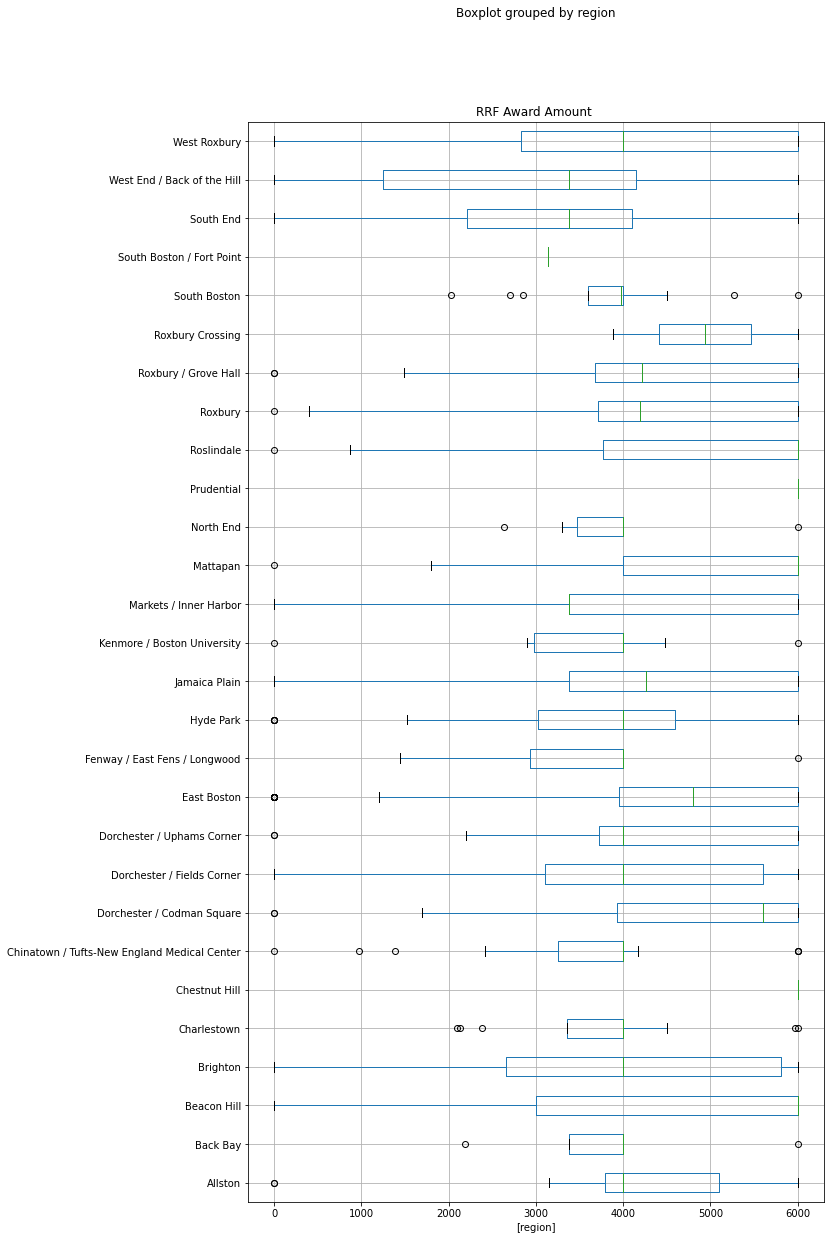

In [6]:
df[['RRF Award Amount ', 'region']].boxplot(by='region', figsize=(10, 20), vert=False)

<AxesSubplot:title={'center':'Rent owing'}, xlabel='[region]'>

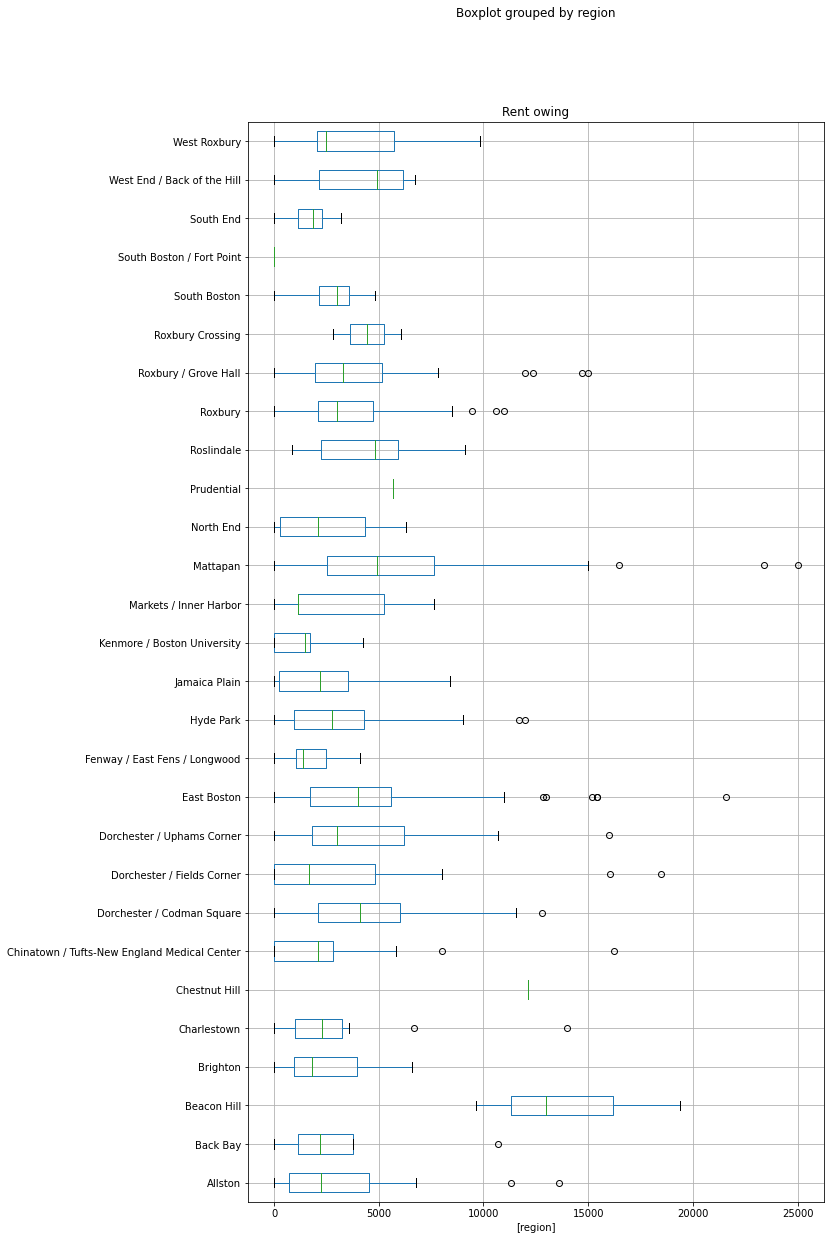

In [7]:
df[['Rent owing', 'region']].boxplot(by='region', figsize=(10, 20), vert=False)

In [8]:
nomi = pgeocode.Nominatim('us')

In [9]:
latitude = (nomi.query_postal_code(zipCode).latitude)
longitude = (nomi.query_postal_code(zipCode).longitude)

In [10]:
RRF_Amount = df[['RRF Award Amount ', 'original_zip']].groupby('original_zip').mean().round(2).reset_index()
Rent_Owing = df[['Rent owing', 'original_zip']].groupby('original_zip').mean().round(2).reset_index()

In [11]:
df_analysis = RRF_Amount.copy()
df_analysis['Rent owing'] = Rent_Owing['Rent owing']
df_analysis['original_zip'] = df_analysis['original_zip'].astype(str).map(lambda x: '0'+x[:-2])
df_analysis['region_name'] = region_name.values()
df_analysis['latitude'] = latitude
df_analysis['longitude'] = longitude
df_analysis

,original_zip,RRF Award Amount,Rent owing,region_name,latitude,longitude
0,02108,4000.00,14001.67,Beacon Hill,42.3576,-71.0684
1,02109,3750.00,3030.00,Markets / Inner Harbor,42.3600,-71.0545
2,02111,3624.18,2694.53,Chinatown / Tufts-New England Medical Center,42.3503,-71.0629
3,02113,3989.17,2548.52,North End,42.3657,-71.0560
4,02114,2881.43,4039.23,West End / Back of the Hill,42.3611,-71.0682
5,02115,3456.67,1770.89,Fenway / East Fens / Longwood,42.3427,-71.0922
6,02116,3914.80,3554.80,Back Bay,42.3492,-71.0768
7,02118,3307.73,1710.57,South End,42.3362,-71.0729
8,02119,4405.91,3702.83,Roxbury,42.3251,-71.0953
9,02120,4939.50,4437.50,Roxbury Crossing,42.3307,-71.0912


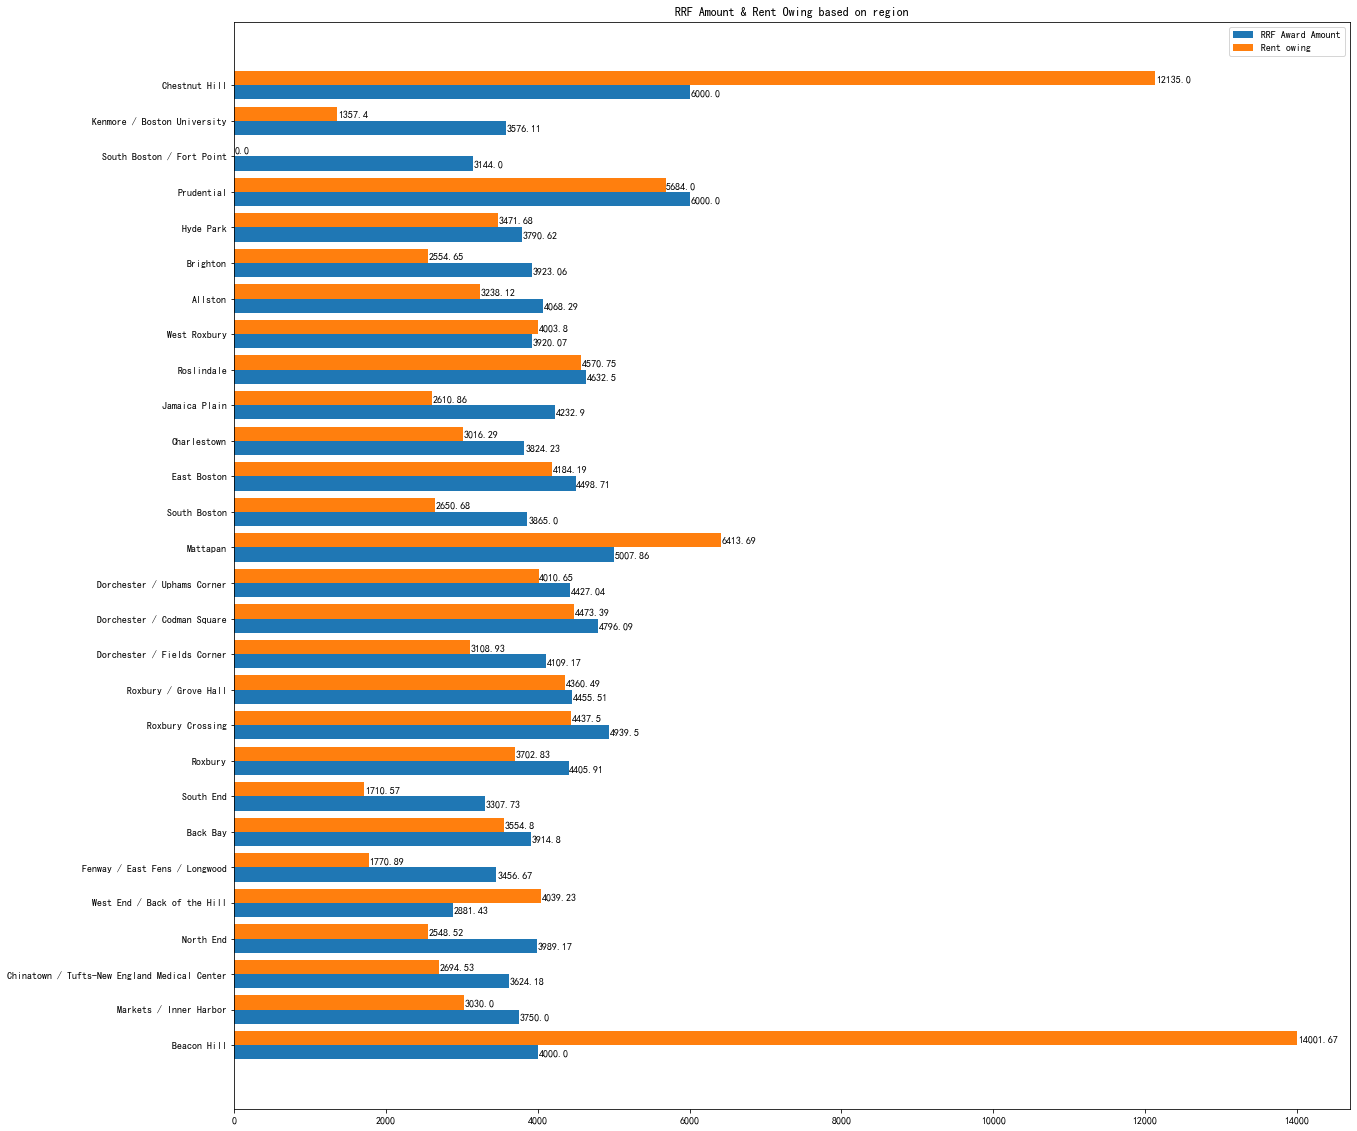

In [12]:
bar_width = 0.4
x_ = np.arange(len(df_analysis))

plt.figure(figsize=(20,20))

plt.barh(x_ - bar_width/2, df_analysis['RRF Award Amount '], height=bar_width , label='RRF Award Amount')
plt.barh(x_ + bar_width/2, df_analysis['Rent owing'], height=bar_width, label='Rent owing')

for x_value, y_value in zip(x_, df_analysis['RRF Award Amount ']):
    plt.text(y=x_value - 3*bar_width/4,x=y_value + 10,s=y_value)

for x_value,y_value in zip(x_, df_analysis['Rent owing']):
    plt.text(y=x_value + bar_width/4,x=y_value + 10,s=y_value)

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title('RRF Amount & Rent Owing based on region')
plt.yticks(x_, df_analysis['region_name'])
plt.legend()
plt.show()

In [13]:
norm_m = folium.Map(location=[42.361145, -71.057083])
HeatMap(df_analysis[['latitude', 'longitude', 'RRF Award Amount ']], min_opacity=0.4).add_to(folium.FeatureGroup(name = "HeatMap").add_to(norm_m))
folium.LayerControl().add_to(norm_m)
norm_m.save("RRF_Amount.html")

In [14]:
norm_m = folium.Map(location=[42.361145, -71.057083])
HeatMap(df_analysis[['latitude', 'longitude', 'Rent owing']], min_opacity=0.4).add_to(folium.FeatureGroup(name = "HeatMap").add_to(norm_m))
folium.LayerControl().add_to(norm_m)
norm_m.save("Rent_Owing.html")

In [15]:
RRF_Amount_sum = df[['RRF Award Amount ', 'original_zip']].groupby('original_zip').sum().round(2).reset_index()
Rent_Owing_sum = df[['Rent owing', 'original_zip']].groupby('original_zip').sum().round(2).reset_index()
df_analysis_sum = RRF_Amount_sum.copy()
df_analysis_sum['Rent owing'] = Rent_Owing_sum['Rent owing']
df_analysis_sum['original_zip'] = df_analysis_sum['original_zip'].astype(str).map(lambda x: '0'+x[:-2])
df_analysis_sum['region_name'] = region_name.values()
df_analysis_sum['latitude'] = latitude
df_analysis_sum['longitude'] = longitude
df_analysis_sum

,original_zip,RRF Award Amount,Rent owing,region_name,latitude,longitude
0,02108,12000.00,42005.00,Beacon Hill,42.3576,-71.0684
1,02109,18750.00,15150.00,Markets / Inner Harbor,42.3600,-71.0545
2,02111,79732.00,59279.69,Chinatown / Tufts-New England Medical Center,42.3503,-71.0629
3,02113,23935.00,15291.09,North End,42.3657,-71.0560
4,02114,20170.00,28274.61,West End / Back of the Hill,42.3611,-71.0682
5,02115,31110.00,15938.00,Fenway / East Fens / Longwood,42.3427,-71.0922
6,02116,19574.00,17774.00,Back Bay,42.3492,-71.0768
7,02118,49616.00,23948.00,South End,42.3362,-71.0729
8,02119,211483.45,177735.71,Roxbury,42.3251,-71.0953
9,02120,9879.00,8875.00,Roxbury Crossing,42.3307,-71.0912


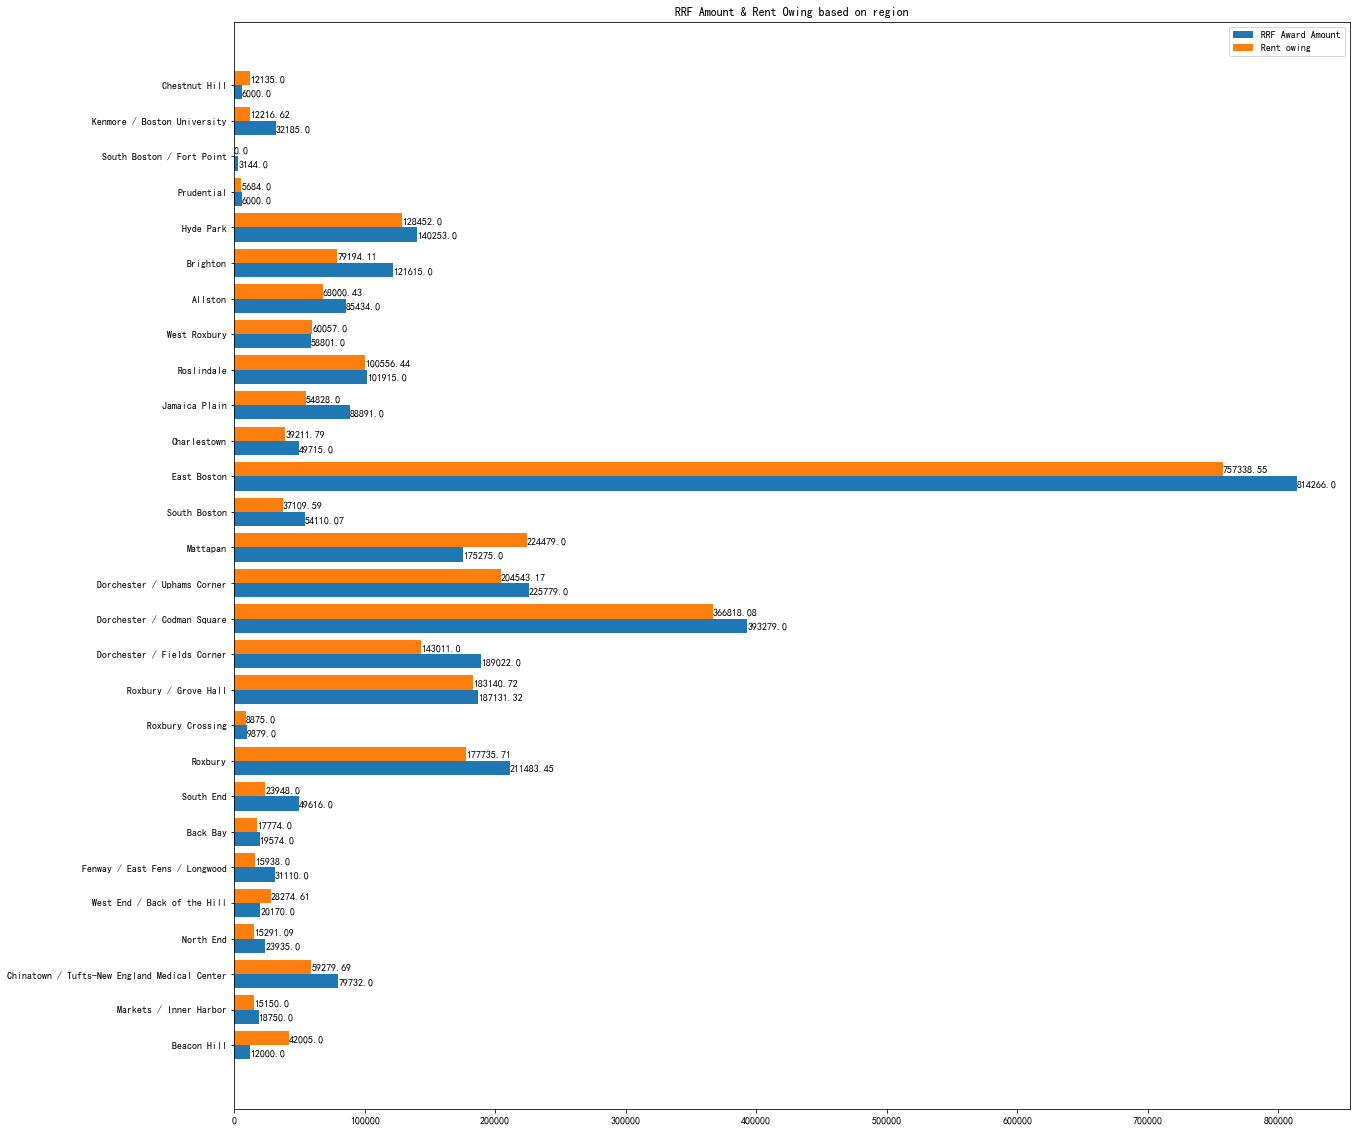

In [16]:
bar_width = 0.4
x_ = np.arange(len(df_analysis))

plt.figure(figsize=(20,20))

plt.barh(x_ - bar_width/2, df_analysis_sum['RRF Award Amount '], height=bar_width , label='RRF Award Amount')
plt.barh(x_ + bar_width/2, df_analysis_sum['Rent owing'], height=bar_width, label='Rent owing')

for x_value, y_value in zip(x_, df_analysis_sum['RRF Award Amount ']):
    plt.text(y=x_value - 3*bar_width/4,x=y_value + 10,s=y_value)

for x_value,y_value in zip(x_, df_analysis_sum['Rent owing']):
    plt.text(y=x_value + bar_width/4,x=y_value + 10,s=y_value)

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title('RRF Amount & Rent Owing based on region')
plt.yticks(x_, df_analysis_sum['region_name'])
plt.legend()
plt.show()

In [17]:
df_analysis_sum[['region_name', 'RRF Award Amount ']].sort_values(by='RRF Award Amount ', ascending=False)

,region_name,RRF Award Amount
16,East Boston,814266.00
12,Dorchester / Codman Square,393279.00
13,Dorchester / Uphams Corner,225779.00
8,Roxbury,211483.45
11,Dorchester / Fields Corner,189022.00
10,Roxbury / Grove Hall,187131.32
14,Mattapan,175275.00
23,Hyde Park,140253.00
22,Brighton,121615.00
19,Roslindale,101915.00


In [18]:
norm_m = folium.Map(location=[42.361145, -71.057083])
HeatMap(df_analysis_sum[['latitude', 'longitude', 'RRF Award Amount ']], min_opacity=0.4).add_to(folium.FeatureGroup(name = "HeatMap").add_to(norm_m))
folium.LayerControl().add_to(norm_m)
norm_m.save("RRF_Amount_sum.html")

In [21]:
norm_m = folium.Map(location=[42.361145, -71.057083])
HeatMap(df_analysis_sum[['latitude', 'longitude', 'Rent owing']], min_opacity=0.4).add_to(folium.FeatureGroup(name = "HeatMap").add_to(norm_m))
folium.LayerControl().add_to(norm_m)
norm_m.save("Rent_Owing_sum.html")

In [20]:
df_analysis_sum['RRF Award Amount '].sort_values(ascending=False).map(lambda x: x/df_analysis_sum['RRF Award Amount '].sum())

16    0.253739
12    0.122553
13    0.070357
8     0.065902
11    0.058903
10    0.058313
14    0.054619
23    0.043705
22    0.037897
19    0.031758
18    0.027700
21    0.026623
2     0.024846
20    0.018323
15    0.016862
17    0.015492
7     0.015461
26    0.010029
5     0.009694
3     0.007459
4     0.006285
6     0.006100
1     0.005843
0     0.003739
9     0.003078
24    0.001870
27    0.001870
25    0.000980
Name: RRF Award Amount , dtype: float64